<a href="https://colab.research.google.com/github/shehryarlodhi/Spam-Message_Classifier/blob/main/Spam_Message_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
df=pd.read_csv('/content/spam.tsv',sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [12]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [14]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

Balancing the data

In [23]:
ham = df[df['label']=='ham']
ham.shape

(4825, 4)

In [24]:
spam = df[df['label']=='spam']
spam.shape

(747, 4)

In [25]:
ham = ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [28]:
data = pd.concat([ham,spam], axis=0, ignore_index=True)
data.shape

(1494, 4)

In [29]:
data.head()

,label,message,length,punct
0,ham,Hello! How's you and how did saturday go? I wa...,155,7
1,ham,I am not having her number sir,30,0
2,ham,"I'm not sure, I was just checking out what was...",72,2
3,ham,Eh sorry leh... I din c ur msg. Not sad alread...,91,7
4,ham,Mm yes dear look how i am hugging you both. :-P,47,3


In [31]:
plt.rcParams['figure.dpi']= 200
plt.rcParams['figure.figsize'] = (10,4)
plt.style.use('ggplot')

In [32]:
ham.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

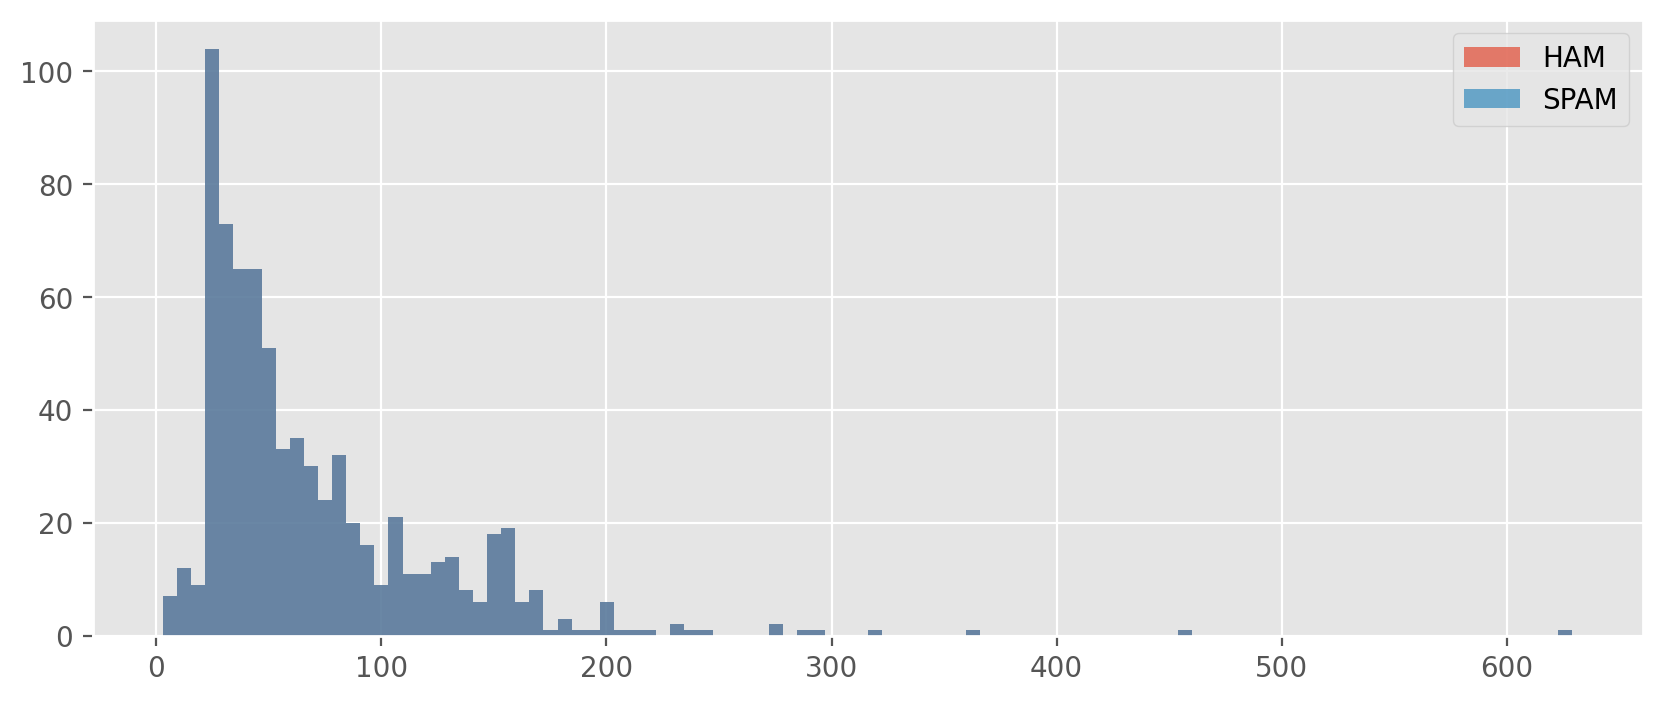

In [38]:
plt.hist(ham['length'],bins=100,alpha=0.7,label='HAM')
plt.hist(ham['length'],bins=100,alpha=0.7,label='SPAM')
plt.legend()
plt.show()

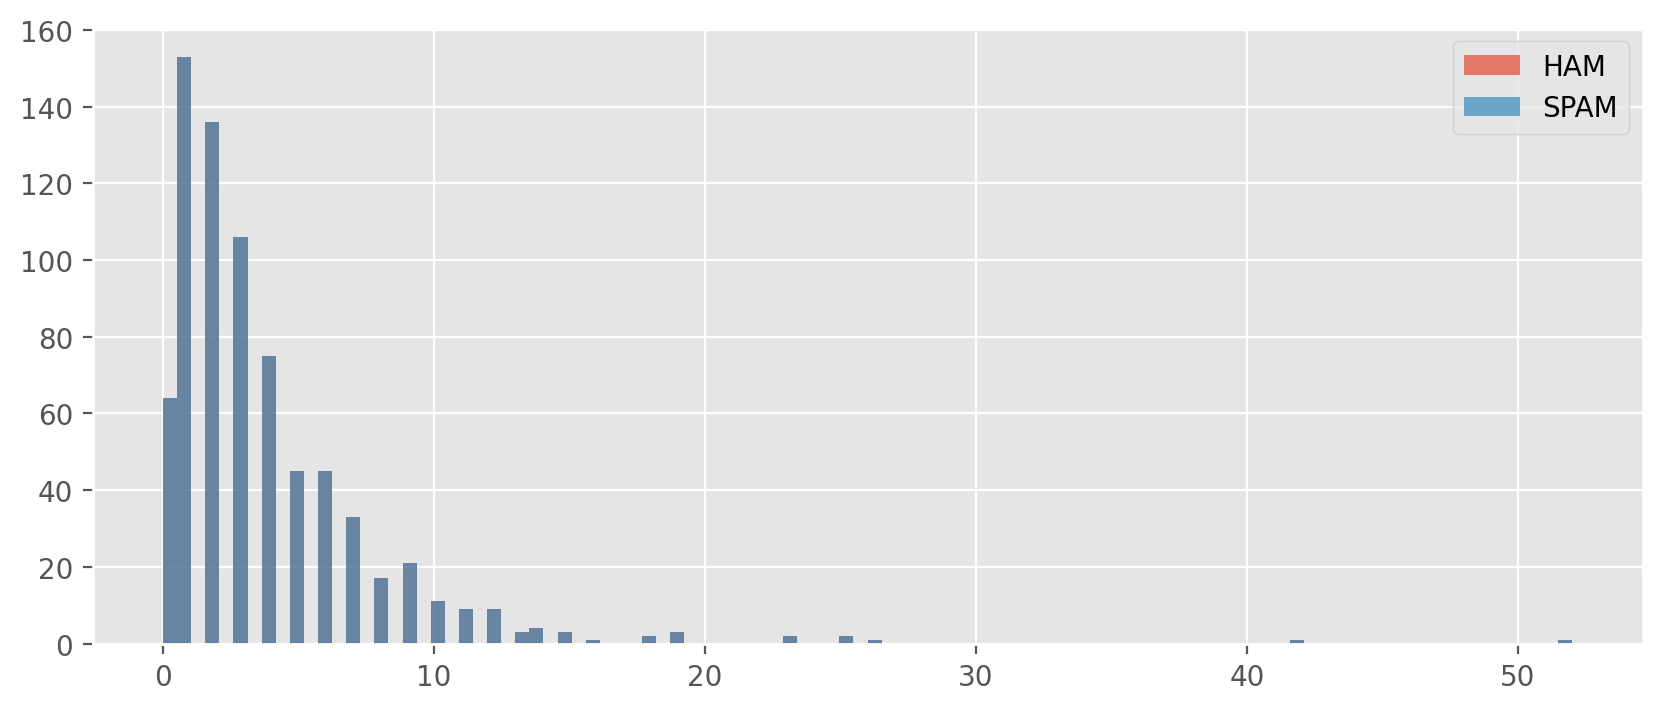

In [39]:
plt.hist(ham['punct'],bins=100,alpha=0.7,label='HAM')
plt.hist(ham['punct'],bins=100,alpha=0.7,label='SPAM')
plt.legend()
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=0,shuffle=True,stratify=data['label'])
X_train.shape, X_test.shape

((1195,), (299,))